# AI vs Human Content detection - Machine Learning & Deep Learning 


https://www.kaggle.com/datasets/pratyushpuri/ai-vs-human-content-detection-1000-record-in-2025 
ova e datasetot od kaggle + description (kje gi trgneme ovie kjelii vo finalnite verzii, sega za sega da sledime kako sme sto sme do kaj sme )

# EDA and PREPROCESSING 


In [68]:
import pandas as pd
import numpy as np
import re, string, math
from collections import Counter


import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
Data=pd.read_csv("../data/ai_human_content_detection_dataset.csv")

type(Data)

pandas.core.frame.DataFrame

In [70]:
Data.shape

(1367, 17)

In [71]:
Data.head(5)

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [72]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1367 non-null   object 
 1   content_type          1367 non-null   object 
 2   word_count            1367 non-null   int64  
 3   character_count       1367 non-null   int64  
 4   sentence_count        1367 non-null   int64  
 5   lexical_diversity     1367 non-null   float64
 6   avg_sentence_length   1367 non-null   float64
 7   avg_word_length       1367 non-null   float64
 8   punctuation_ratio     1367 non-null   float64
 9   flesch_reading_ease   1288 non-null   float64
 10  gunning_fog_index     1332 non-null   float64
 11  grammar_errors        1367 non-null   int64  
 12  passive_voice_ratio   1336 non-null   float64
 13  predictability_score  1367 non-null   float64
 14  burstiness            1367 non-null   float64
 15  sentiment_score      

In [73]:
Data.isna().sum().sort_values(ascending=False)


flesch_reading_ease     79
sentiment_score         54
gunning_fog_index       35
passive_voice_ratio     31
text_content             0
content_type             0
word_count               0
character_count          0
sentence_count           0
punctuation_ratio        0
avg_word_length          0
avg_sentence_length      0
lexical_diversity        0
grammar_errors           0
predictability_score     0
burstiness               0
label                    0
dtype: int64

najsafe opcija e da se napravi drop na redicite kaj sto ima missing values (najbitntie features ni se bez null).
kje izgubime 79 reda, imame dosta primeroci, nema da izgubime mnogu 

In [74]:
Data = Data.dropna()



In [75]:
Data.shape

(1179, 17)

In [76]:
missing_values = Data.apply(lambda x: x.isnull().sum().sum())
print(missing_values)


text_content            0
content_type            0
word_count              0
character_count         0
sentence_count          0
lexical_diversity       0
avg_sentence_length     0
avg_word_length         0
punctuation_ratio       0
flesch_reading_ease     0
gunning_fog_index       0
grammar_errors          0
passive_voice_ratio     0
predictability_score    0
burstiness              0
sentiment_score         0
label                   0
dtype: int64


In [77]:
Data.describe() 

,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
count,1179.00000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,140.09754,939.950806,25.575064,0.967592,5.492392,5.721349,0.027406,52.093079,7.557286,1.567430,0.149918,63.141077,0.427259,-0.002566,0.500424
std,98.36175,660.868244,18.057071,0.026207,0.452961,0.286955,0.002866,10.564724,1.865698,1.932518,0.056925,28.323529,0.199299,0.591635,0.500212
min,3.00000,14.000000,1.000000,0.875000,3.000000,4.000000,0.019400,-50.010000,1.200000,0.000000,0.050000,20.030000,0.101900,-0.999300,0.000000
25%,59.00000,400.500000,11.000000,0.951750,5.290000,5.590000,0.026100,47.660000,6.620000,0.000000,0.099150,39.290000,0.250600,-0.523950,0.000000
50%,130.00000,882.000000,24.000000,0.969100,5.490000,5.710000,0.027200,52.170000,7.510000,1.000000,0.150400,57.260000,0.413300,-0.006300,1.000000
75%,192.00000,1287.500000,35.000000,0.989000,5.700000,5.830000,0.028400,57.275000,8.395000,3.000000,0.200200,87.360000,0.592000,0.520600,1.000000
max,443.00000,2966.000000,83.000000,1.000000,8.000000,8.330000,0.071400,98.870000,27.870000,10.000000,0.250000,119.930000,0.798400,0.995900,1.000000


## 1. EDA

Analysing the data and creating different chars for better visualisation

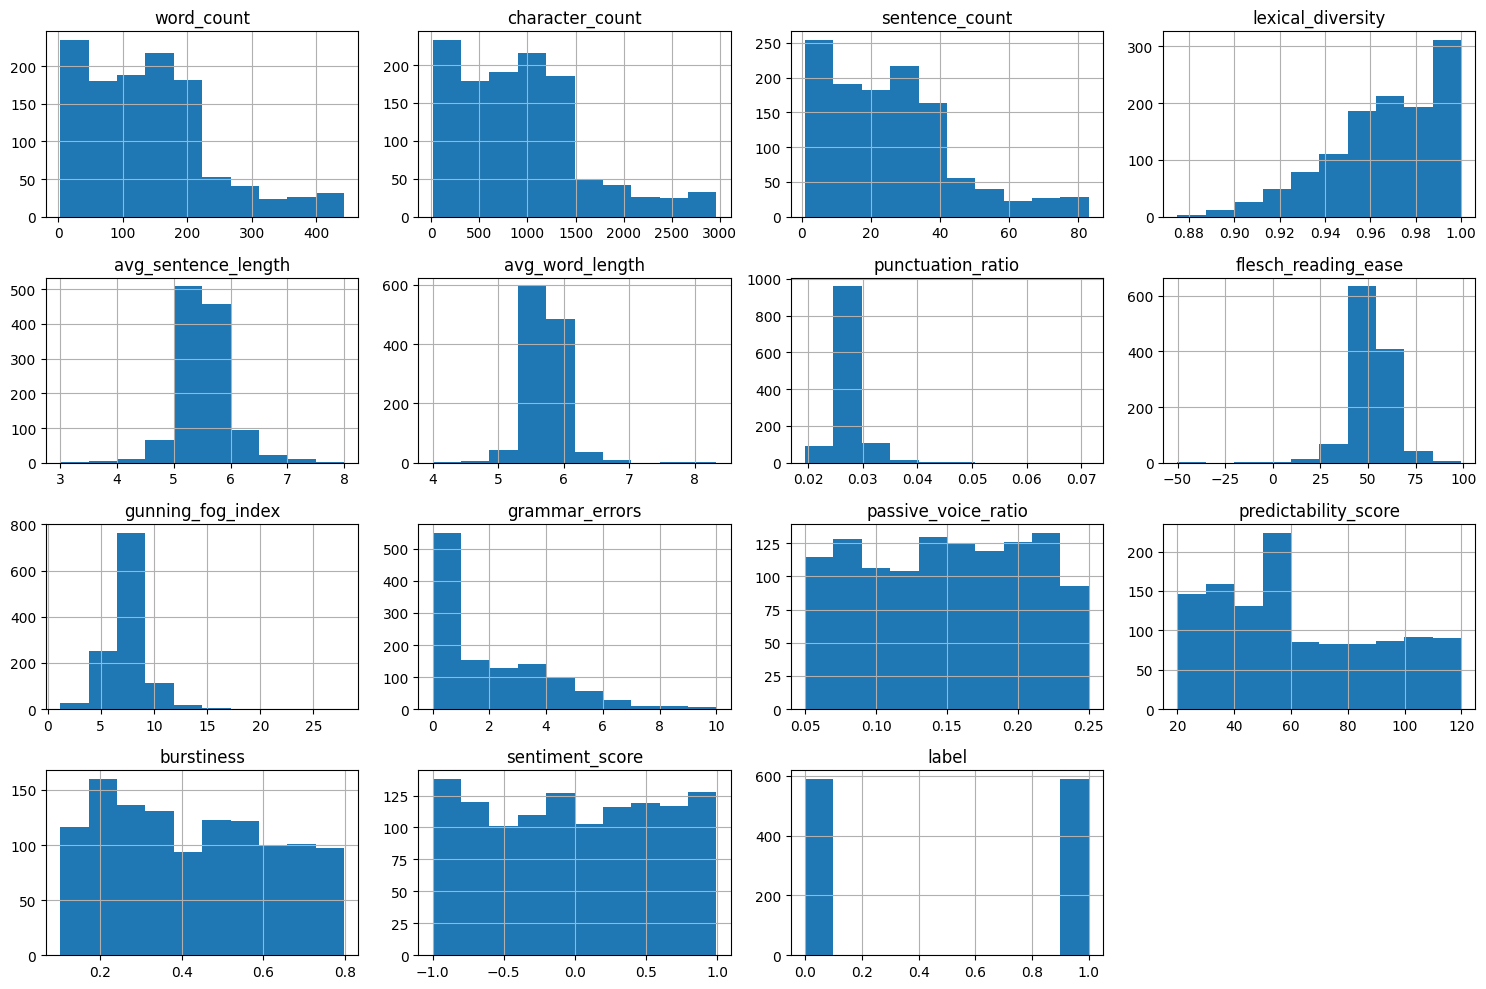

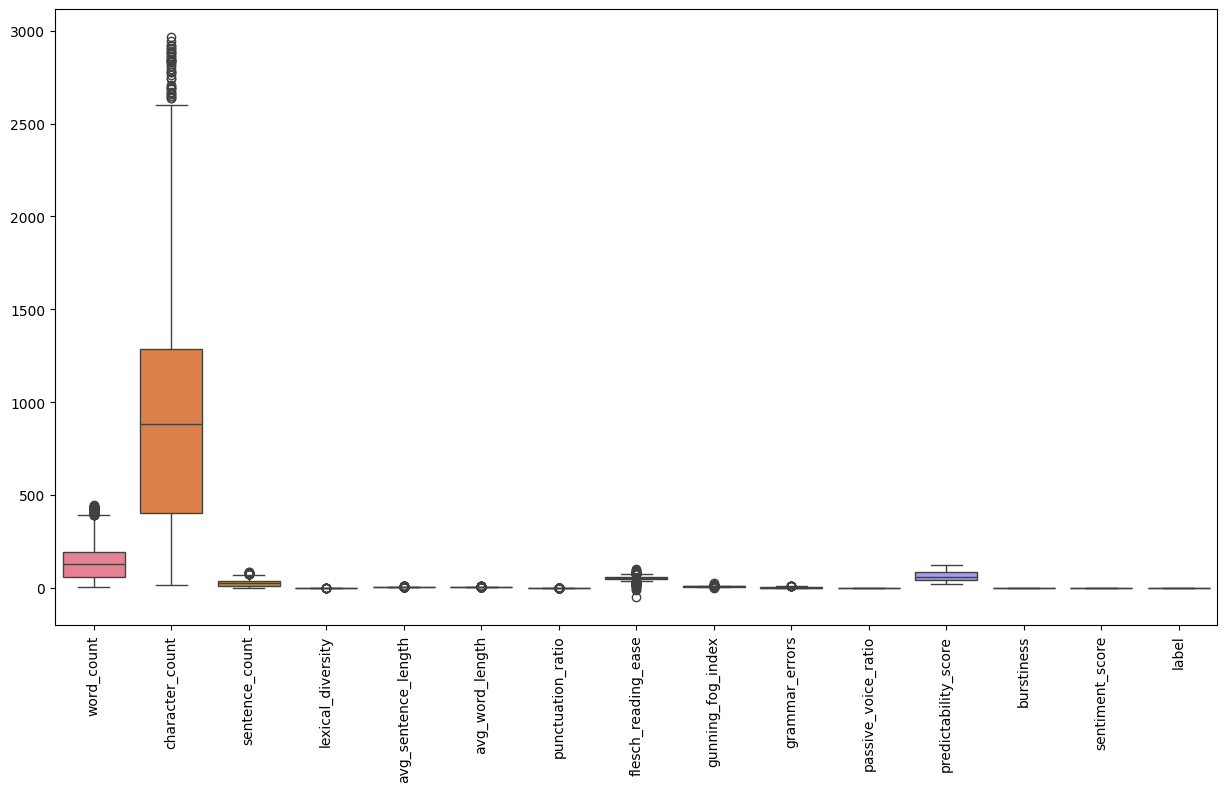

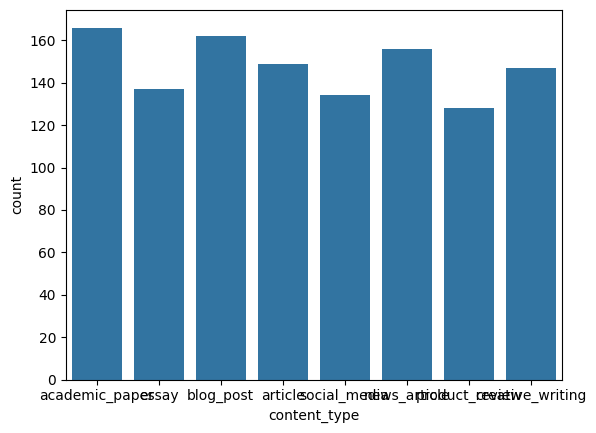

In [78]:
# Histogram for all numerical features
Data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=Data.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

# Bar plot for content_type
sns.countplot(x='content_type', data=Data)
plt.show()

In [79]:
data_ml = Data.copy() 
data_dl = Data.copy()

In [80]:
dummies = pd.get_dummies(data_ml["content_type"], drop_first=False)
dummies = dummies.add_prefix("encoded_").astype(int)
data_ml = pd.concat([data_ml.drop(columns=["content_type"]), dummies], axis=1)

In [81]:
data_ml.head(3)

,text_content,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,...,sentiment_score,label,encoded_academic_paper,encoded_article,encoded_blog_post,encoded_creative_writing,encoded_essay,encoded_news_article,encoded_product_review,encoded_social_media
0,Score each cause. Quality throughout beautiful...,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,...,0.2034,1,1,0,0,0,0,0,0,0
1,Board its rock. Job worker break tonight coupl...,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,...,0.4854,1,0,0,0,0,1,0,0,0
2,Way debate decision produce. Dream necessary c...,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,...,-0.2369,1,1,0,0,0,0,0,0,0


## ML PREPROCESSING

kje odime so tfidf za ml modelite da se pojaki i podobro sporedlivi so dl modelite (Sepak e analiza na tekst, a ako mu gi dademe na ml samo numerickite features, nema da bide dobar modelot)

znaci tuka go podgotvuvam datasetov za treniranje

In [82]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import sparse
import joblib
import re

In [83]:
text_col = "text_content"

numeric_cols = [
    "word_count","character_count",	"sentence_count","lexical_diversity","avg_sentence_length",	"avg_word_length",
    "punctuation_ratio","flesch_reading_ease","gunning_fog_index", "grammar_errors"	,"passive_voice_ratio","predictability_score",
    "burstiness","sentiment_score"

]

#one hot encoded cols
ohe_cols = [c for c in data_ml.columns if c.startswith("encoded_")]



In [84]:
#Define transformers
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_df=0.9,
    min_df=2,
    max_features=10000,   # tune if needed
    strip_accents="unicode",
    lowercase=True
)

scaler = StandardScaler(with_mean=False)  # keep sparse compatibility  (ova si ide so tfidf, zatoa posebno ne se pravi standardizacija)

In [85]:
#column transformer 

transformer = ColumnTransformer(
    transformers=[
        ("tfidf", tfidf, text_col),
        ("num", scaler, numeric_cols),
        ("ohe_passthrough", "passthrough", ohe_cols)  # harmless if empty
    ],
    remainder="drop",
    sparse_threshold=0.3   # keep sparse output
)

In [86]:
# Build pipeline
preprocess = Pipeline([
    ("ct", transformer)
])

In [87]:
X = preprocess.fit_transform(data_ml)

print(X.shape)

(1179, 10022)


In [88]:
# ColumnTransformer from the pipeline
ct = preprocess.named_steps["ct"]

# TfidfVectorizer 
tfidf_v = ct.named_transformers_["tfidf"]

tfidf_tokens = tfidf_v.get_feature_names_out()
print(tfidf_tokens[:20])


['ability' 'ability little' 'ability live' 'ability policy'
 'ability practice' 'ability question' 'ability simple' 'ability there'
 'ability those' 'ability threat' 'ability wide' 'ability work' 'able'
 'able alone' 'able although' 'able author' 'able crime' 'able figure'
 'able great' 'able in']


In [89]:
# splitting for test and train

from sklearn.model_selection import train_test_split

y = data_ml["label"]    

X = data_ml.drop(columns=["label"]) 

X_train_df, X_test_df, y_train, y_test = train_test_split(
    data_ml, y, test_size=0.2, stratify=y, random_state=42
)

preprocess.fit(X_train_df)
X_train = preprocess.transform(X_train_df)
X_test  = preprocess.transform(X_test_df)

print(X_train.shape, X_test.shape)


(943, 9165) (236, 9165)


80% so 20% e splitot


In [90]:
#saving the X_train, X_test, y_train, y_test and pipeline for training 

import joblib
from scipy import sparse
import pandas as pd

# Save pipeline
joblib.dump(preprocess, "preprocess_pipeline.joblib")

# Save matrices (sparse)
sparse.save_npz("X_train.npz", X_train)
sparse.save_npz("X_test.npz", X_test)

# Save labels
pd.Series(y_train).to_csv("y_train.csv", index=False)
pd.Series(y_test).to_csv("y_test.csv", index=False)


# DL PREPOCESSING 

In [91]:
y_dl = data_dl["label"].values
X_features = data_dl.drop(columns=["label"])
print( y_dl[:10])

[1 1 1 1 1 1 1 1 1 1]


In [92]:
#test train split on raw features
from sklearn.model_selection import train_test_split

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_features, y_dl, test_size=0.2, stratify=y_dl, random_state=42
)

In [93]:
X_train_dl.shape


(943, 16)

In [94]:
X_test_dl.shape

(236, 16)

Deep learning models cannot use raw text, so we convert each document into a sequence of numbers. We do this with tokenization (each word is assigned an index) and padding (all sequences have the same length).
    
Tokenizer: builds a vocabulary of the most frequent words in the dataset.

Sequences: each text becomes a list of integers (IDs of words).

Padding: ensures equal length, so that texts can be batched into the model.

In [95]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [96]:
# text (tokenize+pad) fit on TRAIN only

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 20000
MAX_LEN = 300

tokenizer_dl = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer_dl.fit_on_texts(X_train_dl["text_content"])

X_text_train = pad_sequences(
    tokenizer_dl.texts_to_sequences(X_train_dl["text_content"]),
    maxlen=MAX_LEN, padding="post", truncating="post"
)
X_text_test = pad_sequences(
    tokenizer_dl.texts_to_sequences(X_test_dl["text_content"]),
    maxlen=MAX_LEN, padding="post", truncating="post"
)

In [97]:
X_text_train.shape

(943, 300)

In [98]:
X_text_test.shape

(236, 300)

In [99]:
from sklearn.preprocessing import StandardScaler

#standardizing num features (on TRAIN only)

num_cols = [ "word_count","character_count",	"sentence_count","lexical_diversity","avg_sentence_length",	"avg_word_length",
    "punctuation_ratio","flesch_reading_ease","gunning_fog_index", "grammar_errors"	,"passive_voice_ratio","predictability_score",
    "burstiness","sentiment_score"
]
num_cols = [c for c in num_cols if c in X_features.columns]

scaler_dl = StandardScaler()
X_num_train = scaler_dl.fit_transform(X_train_dl[num_cols])
X_num_test  = scaler_dl.transform(X_test_dl[num_cols])


In [101]:
#one hot encoded data

encoded_cols = [
    "encoded_academic_paper","encoded_article","encoded_blog_post",
    "encoded_creative_writing","encoded_essay","encoded_news_article",
    "encoded_product_review","encoded_social_media"
]
X_encoded_train = X_train_df[encoded_cols].values
X_encoded_test  = X_test_df[encoded_cols].values

In [102]:
X_encoded_train.shape

(943, 8)

In [103]:
X_encoded_test.shape

(236, 8)

In [104]:
#saving

np.save("X_text_train_dl.npy", X_text_train)
np.save("X_text_test_dl.npy",  X_text_test)
np.save("X_num_train_dl.npy",  X_num_train)
np.save("X_num_test_dl.npy",   X_num_test)
np.save("X_enc_train_dl.npy",  X_encoded_train)
np.save("X_enc_test_dl.npy",   X_encoded_test)
np.save("y_train_dl.npy",      y_train_dl)
np.save("y_test_dl.npy",       y_test_dl)


In [ ]:
#proveri posebno za dl sto naprajv, na kraj vekje izgubiv koncentracija i mozno e da ima nekoi propusti